<a href="https://colab.research.google.com/github/achen4824/ASP.NET-ReactJS/blob/master/assignment3_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this part of the assignment, we are going to implement an XORnet. 

![The XOR Truth Table](https://cdn-images-1.medium.com/max/1600/1*Xp1D32f-br8RCng5gjZMCA.gif)

XOR is a problem that is not linearly separable, it means we need a hidden layer in our network. 

![XOR is not linearly separable](http://web.science.mq.edu.au/~cassidy/comp449/html/xor.gif)

The network we are going implement below will use sigmoid function as activation and we are going to use Mean Squared Error as the loss. 


**Network design**

The network has three layers:


*  Input Layer (Taking two input A,B and a bias): This has a size of 3
*  Hidden Layer (you can change the number of neuron in this layer)
* Output Layer: This has a size of 1 as we are generating a single number for every input


**Functions to implement **

* forward(): That takes the current inputs, passes it through the network and generates and output y_hat
* backward(): That does back-propagation to update weight. The sigmoid function and its derivative are provided. You have to derive the gradients **dW1** and **dW2** to updates weights *W1* and *W2*. The formula for update is given.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math  

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1.0 - sigmoid(x))
  
class XORnet:
    def __init__(self, x, y, h_size):
      
        # Inputs: 
        # x : the inputs
        # y : the groundtruth outputs
        # h_size : the number of nuerons in the hidden layer
        
        # we store x and y locally so we do not have to pass them everytime
        self.input      = x
        self.y          = y

        #save upstream numbers for calculating gradient for backpropogation
        #bsig stands for before sigmoid
        self.W1bsig = 0
        self.W2bsig = 0
        self.savloss = 0
        
        # W1 has a size of (3 x h_size)
        self.W1   = np.random.rand(self.input.shape[1],h_size) 
        
        #W2 has a size of (h_size x 1)
        self.W2   = np.random.rand(h_size,1) 
        
        
        self.output     = np.zeros(self.y.shape) # This is y_hat (the output)

    def forward(self):
      
        # TODO: 
        # implement the forward function that takes through each layer and
        # the corresponding activation function, this will generate the 
        # output that should be stored in self.output

        #feed input into weights/nodes remembering one weight per input per node
        self.output = np.matmul(self.input,self.W1)
        self.W1bsig = np.copy(self.output)

        #apply sigmoid
        for i in range(self.output.shape[0]):
          for j in range(self.output.shape[1]):
            self.output[i][j] = sigmoid(self.output[i][j])

        #feed first layer into second layer
        self.output = np.matmul(self.output,self.W2)
        self.W2bsig = np.copy(self.output)

        #apply sigmoid
        for i in range(self.output.shape[0]):
          self.output[i] = sigmoid(self.output[i])

        #calculate loss for each sample
        self.savloss = np.copy(self.output)
        for i in range(self.output.shape[0]):
          self.savloss[i] = self.y[i] - self.output[i]
          
        #sum of squared loss
        return np.dot((self.y - self.output).T, (self.y - self.output))
      
    def backward(self):
        # TODO: 
        # apply the chain rule to find derivative of the loss function 
        # with respect to W2 and W1

        d_W2 = 0 # Replace with correct derivative of the loss wrt W2
        d_W1 = 0 # Replace with correct derivative of the loss wrt W1

        d_W2 = np.zeros(self.W2.shape[0])
        d_W1 = np.zeros((self.W1.shape[0],self.W1.shape[0],))

        #compute graidents
        for allinput in range(self.output.shape[0]):
          #compute gradients for 2 layer of weights
          for j in range(d_W2.shape[0]):
              d_W2[j] += -1 * 2 * self.savloss[allinput] * -1 * sigmoid_derivative(self.W2bsig[allinput]) * sigmoid(self.W1bsig[allinput][j])
          
          #compute gradients for first layer of weights
          for a in range(d_W1.shape[0]):
                for b in range(d_W1.shape[1]):
                    d_W1[b][a] += -1 * 2 * self.savloss[allinput] * -1 * sigmoid_derivative(self.W2bsig[allinput]) * self.W2[a]* sigmoid_derivative(self.W1bsig[allinput][a]) * self.input[allinput][b]

        #average out gradients
        d_W1 = 0.25* d_W1
        d_W2 = 0.25* d_W2

        # we update the weights with the computed derivatives
        for i in range(self.W2.shape[0]):
          self.W2[i] += d_W2[i]
        self.W1 = np.add(self.W1, d_W1)


Streaming output truncated to the last 5000 lines.
 [ 0.00171341  0.00270608  0.00161676]
 [ 0.00198003 -0.0041891  -0.00093735]]
[-0.00142769 -0.00598818  0.00412495]
[[-0.00200392  0.00221564  0.00093153]
 [ 0.00168997  0.00267769  0.0015994 ]
 [ 0.00195965 -0.00414366 -0.00092959]]
[-0.00140888 -0.00593097  0.00408248]
[[-0.00198033  0.00219393  0.00092001]
 [ 0.00166704  0.00264978  0.00158237]
 [ 0.00193964 -0.00409907 -0.00092195]]
[-0.00139052 -0.00587472  0.00404081]
[[-0.00195723  0.0021726   0.00090874]
 [ 0.00164463  0.00262236  0.00156567]
 [ 0.00192    -0.0040553  -0.00091444]]
[-0.00137259 -0.00581941  0.00399991]
[[-0.00193461  0.00215163  0.00089772]
 [ 0.00162272  0.00259541  0.00154929]
 [ 0.00190071 -0.00401233 -0.00090705]]
[-0.00135507 -0.00576502  0.00395978]
[[-0.00191245  0.00213103  0.00088693]
 [ 0.00160128  0.00256892  0.00153321]
 [ 0.00188177 -0.00397013 -0.00089978]]
[-0.00133796 -0.00571153  0.00392039]
[[-0.00189073  0.00211078  0.00087637]
 [ 0.00158031

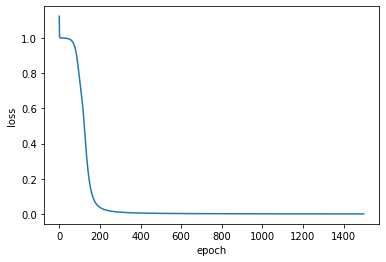

In [4]:
num_iterations = 1500
num_hidden_neurons = 3

# The four possible combination of two bits go as input,
# along with a bias which is always set to 1
# The input is organised as [A, B, bias] 
# Each row represents a sample

X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1.]]) 

# The corresponding output for each case

Y = np.array([[0],
              [1],
              [1],
              [0.]])

# This defines our XORnet and 
net = XORnet(X,Y,num_hidden_neurons)

# We store losses after each epoch here 
losses = np.zeros((num_iterations,1))

for i in range(num_iterations):
    loss = net.forward()
    losses[i] = loss
    net.backward()

print("Expected Output: \n",  (Y.T))
print("Current output :\n", net.output.T)

plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()